<code>years_em</code> fueron completados con ceros

<code>years_demency</code> fueron completados con ceros

<code>tecar</code> reasignado con binario

<code>lateralidad</code> reasignado con binario: 1:diestro

<code>genero</code> reasignado con binario: 1:M 0:H

<code>tipico</code>, <code>tipico</code> y <code>deposito</code> han sido completadas con ceros en las casillas vacías (Entre los existentes ninguno tiene valor cero)

Paciente 10: variable <code>posee_dii</code> vacío. Se ha puesto 'NO'

Paciente 25: variables <code>forst_iden</code>,	<code>fcsrt_free_recall_score</code>,	<code>fcsrt_cued_recall_score</code> y	<code>fcsrt_total_recall_score</code> vacías. Se ha puesto 0


Variables han sido reescritas en minúscula y separadas con _


In [14]:
# Imports needed for the script
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

In [41]:
data = pd.read_csv("memory_all_vars_patients.csv") 
names = data_non.columns
data_non.columns = [''] * len(data_non.columns)
data.shape

(35, 35)

In [42]:
data.head()

,edad,lateralidad,genero,escolaridad,years_em,years_demency,posee_hta,posee_dii,tipico,atipico,...,rey_figure_delayed_recalled,digit_span,boston_naming_test,tmt_a,tmt_b,forst_iden,fcsrt_free_recall_score,fcsrt_cued_recall_score,fcsrt_total_recall_score,diagnostico
0,79,DIESTRO,M,5,55,6,SI,NO,5,56,...,0.0,0,15,126,150,0,0,0,0,F203-DEM.F001
1,70,DIESTRO,M,5,43,3,SI,NO,235,28,...,0.0,3,5,126,150,13,0,0,0,F203-DEM.F001
2,70,DIESTRO,H,5,45,2,NO,NO,148,0,...,0.0,0,15,126,150,10,9,13,22,F203-DEM.F001
3,77,DIESTRO,H,0,48,1,SI,NO,122,21,...,5.0,3,0,95,150,16,15,29,44,F203-DEM.F001
4,69,DIESTRO,M,5,29,3,NO,NO,96,0,...,0.0,3,16,126,150,16,13,10,23,F203-DEM.F011


In [43]:
data.groupby('diagnostico').size()

diagnostico
C                     15
F200                   1
F203                   9
F203-DEM-Z864-FO01     1
F203-DEM.F000          1
F203-DEM.F001          5
F203-DEM.F011          2
F203-DEM.F020          1
dtype: int64

In [44]:
data['posee_hta_encoded'] = data['posee_hta'].map( {'SI': 1, 'NO': 0, 'si': 1, 'no': 0} ).astype(int)
data['posee_dii_encoded'] = data['posee_dii'].map( {'SI': 1, 'NO': 0, 'si': 1, 'no': 0} ).astype(int)
data['genero_encoded'] = data['genero'].map( {'M': 1, 'H': 0, 'm': 1, 'h': 0} ).astype(int)
data['lateralidad_encoded'] = data['lateralidad'].map( {'DIESTRO': 1, 'ZURDO': 0, 'diestro': 1, 'zurdo': 0} ).astype(int)
data['diagnostico_encoded'] = data['diagnostico'].map( {'C': 0, 
                                                        'F200': 1, 
                                                        'F203': 1, 
                                                        'F203-DEM.F000': 2,
                                                        'F203-DEM-Z864-FO01': 2,
                                                        'F203-DEM.F001': 2,
                                                        'F203-DEM.F011': 2,
                                                        'F203-DEM.F020': 2} ).astype(int)

In [51]:
drop_elements = ['posee_hta','posee_dii','genero','lateralidad','diagnostico','escolaridad','nombre']
data_encoded = data.drop(drop_elements, axis = 1)
data_encoded.head(35)
names = data_encoded.columns

In [52]:
x = data_encoded.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data_scaled = pd.DataFrame(x_scaled)

data_scaled.shape
data_scaled.columns = names
data_scaled.head(35)

,edad,years_em,years_demency,tipico,atipico,deposito,meses_con_antipsicotico,tecar,depression,hachinski_ischemia_score,...,tmt_b,forst_iden,fcsrt_free_recall_score,fcsrt_cued_recall_score,fcsrt_total_recall_score,posee_hta_encoded,posee_dii_encoded,genero_encoded,lateralidad_encoded,diagnostico_encoded
0,1.000000,1.000000,1.000000,0.008651,0.146982,0.000000,0.105536,1.0,1.000000,0.50,...,0.460396,0.0000,0.000000,0.000000,0.000000,1.0,0.0,1.0,0.0,1.0
1,0.735294,0.781818,0.500000,0.406574,0.073491,0.868085,0.807958,0.0,0.000000,0.25,...,0.460396,0.8125,0.000000,0.000000,0.000000,1.0,0.0,1.0,0.0,1.0
2,0.735294,0.818182,0.333333,0.256055,0.000000,0.502128,0.460208,0.0,0.083333,0.75,...,0.460396,0.6250,0.219512,0.276596,0.252874,0.0,0.0,0.0,0.0,1.0
3,0.941176,0.872727,0.166667,0.211073,0.055118,0.612766,0.496540,1.0,0.416667,1.00,...,0.460396,1.0000,0.365854,0.617021,0.505747,1.0,0.0,0.0,0.0,1.0
4,0.705882,0.527273,0.500000,0.166090,0.000000,0.255319,0.269896,0.0,0.166667,0.25,...,0.460396,1.0000,0.317073,0.212766,0.264368,0.0,0.0,1.0,0.0,1.0
5,0.323529,0.490909,0.833333,0.000000,0.091864,0.629787,0.316609,0.0,0.333333,1.00,...,0.460396,0.7500,0.804878,0.404255,0.597701,0.0,0.0,0.0,0.0,1.0
6,0.705882,0.690909,0.500000,0.013841,0.005249,1.000000,0.423875,0.0,0.000000,0.25,...,0.460396,0.0000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,1.0
7,0.676471,0.727273,0.666667,0.304498,0.396325,0.880851,0.923875,0.0,0.833333,0.50,...,0.460396,0.9375,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0
8,0.764706,0.872727,0.666667,1.000000,0.000000,0.000000,1.000000,0.0,0.083333,0.50,...,0.460396,0.6875,0.195122,0.595745,0.413793,0.0,0.0,0.0,0.0,1.0
9,0.500000,0.727273,0.666667,0.243945,0.007874,0.000000,0.249135,0.0,0.500000,0.50,...,0.460396,0.8125,0.243902,0.085106,0.160920,1.0,0.0,1.0,0.0,1.0


In [53]:
cv = KFold(n_splits=10) # Numero deseado de "folds" que haremos
accuracies = list()
max_attributes = len(list(data_encoded))
depth_range = range(1, max_attributes + 1)

# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             max_depth = depth,
                                             class_weight={1:3.5})
    for train_fold, valid_fold in cv.split(data_encoded):
        f_train = data_encoded.loc[train_fold] 
        f_valid = data_encoded.loc[valid_fold] 

        model = tree_model.fit(X = f_train.drop(['diagnostico_encoded'], axis=1), 
                               y = f_train["diagnostico_encoded"]) 
        valid_acc = model.score(X = f_valid.drop(['diagnostico_encoded'], axis=1), 
                                y = f_valid["diagnostico_encoded"]) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
# Mostramos los resultados obtenidos
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.625000
         2          0.575000
         3          0.625000
         4          0.600000
         5          0.591667
         6          0.566667
         7          0.625000
         8          0.566667
         9          0.541667
        10          0.566667
        11          0.600000
        12          0.591667
        13          0.575000
        14          0.600000
        15          0.600000
        16          0.575000
        17          0.600000
        18          0.600000
        19          0.575000
        20          0.600000
        21          0.575000
        22          0.566667
        23          0.591667
        24          0.575000
        25          0.566667
        26          0.625000
        27          0.575000
        28          0.591667
        29          0.591667
        30          0.600000
        31          0.591667
        32          0.600000
        33          0.566667
        34    

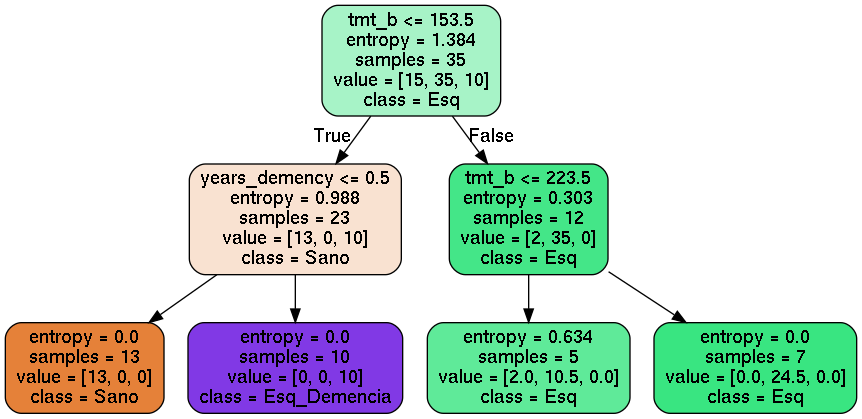

In [55]:
# Crear arrays de entrenamiento y las etiquetas que indican si llegó a top o no 
y_train = data_encoded['diagnostico_encoded']
x_train = data_encoded.drop(['diagnostico_encoded'], axis=1).values 
 
# Crear Arbol de decision con profundidad = 4
decision_tree = tree.DecisionTreeClassifier(criterion='entropy',
                                            min_samples_split=8,
                                            min_samples_leaf=5,
                                            max_depth = 7,
                                            class_weight={1:3.5})
decision_tree.fit(x_train, y_train) 
# exportar el modelo a archivo .dot
with open(r"tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 7,
                              impurity = True,
                              feature_names = list(data_encoded.drop(['diagnostico_encoded'], axis=1)),
                              class_names = ['Sano', 'Esq', 'Esq_Demencia'],
                              rounded = True,
                              filled= True )
        
# Convertir el archivo .dot a png para poder visualizarlo
check_call(['dot','-Tpng',r'tree1.dot','-o',r'tree1.png'])
PImage("tree1.png")

In [13]:
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
print(acc_decision_tree)

94.29
